## Events Analysis
## 2016 Election

This notebook looks at changes around the 2016 Election.

### Import packages and load data

In [1]:
import gensim#For word2vec, etc
import requests #For downloading our datasets
import lucem_illud_2020

import numpy as np #For arrays
import pandas as pd #Gives us DataFrames
import matplotlib.pyplot as plt #For graphics
import seaborn #Makes the graphics look nicer
import sklearn.metrics.pairwise #For cosine similarity
import sklearn.manifold #For T-SNE
import sklearn.decomposition #For PCA
import nltk
import seaborn as sns

import os #For looking through files
import os.path #For managing file paths

from ast import literal_eval
import source.helper_functions as helper

%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
# load corpus
file = 'total_trans_normalized.csv'
tal_df = pd.read_csv(file, converters = helper.converters)

In [113]:
tal_df.head()

,ep_num,ep_title,year,url,act_name,text,tokenized_sents,no_lemma_normalized_sents,normalized_sents,tokenized_text,normalized_tokens,no_lemma_normalized_tokens
0,1,New Beginnings,1995,https://www.thisamericanlife.org/1/transcript,Act Four: Act Four,This is Your Radio Playhouse. I'm Ira Glass. O...,"[[This, is, Your, Radio, Playhouse], [I, 'm, I...","[[radio, playhouse], [m, ira, glass], [ok, rig...","[[radio, playhouse], [be, ira, glass], [okay, ...","[This, is, Your, Radio, Playhouse, I, 'm, Ira,...","[radio, playhouse, be, ira, glass, okay, right...","[radio, playhouse, m, ira, glass, ok, right, r..."
1,1,New Beginnings,1995,https://www.thisamericanlife.org/1/transcript,Act Three: Act Three,"Well, next on our little playhouse stage, we h...","[[Well, next, on, our, little, playhouse, stag...","[[little, playhouse, stage, mr, lawrence, steg...","[[little, playhouse, stage, mr, lawrence, steg...","[Well, next, on, our, little, playhouse, stage...","[little, playhouse, stage, mr, lawrence, stege...","[little, playhouse, stage, mr, lawrence, stege..."
2,1,New Beginnings,1995,https://www.thisamericanlife.org/1/transcript,Act Two: Act Two,"Good morning. Glass, Jacobson & Associates.Hey...","[[Good, morning], [Glass, Jacobson, Associates...","[[good, morning], [glass, jacobson, associates...","[[good, morning], [glass, jacobson, associate]...","[Good, morning, Glass, Jacobson, Associates, H...","[good, morning, glass, jacobson, associate, he...","[good, morning, glass, jacobson, associates, h..."
3,1,New Beginnings,1995,https://www.thisamericanlife.org/1/transcript,Act One: Act One,"All right, Your Radio Playhouse. All right. I'...","[[All, right, Your, Radio, Playhouse], [All, r...","[[right, radio, playhouse], [right], [m, makin...","[[right, radio, playhouse], [right], [be, make...","[All, right, Your, Radio, Playhouse, All, righ...","[right, radio, playhouse, right, be, make, eye...","[right, radio, playhouse, right, m, making, ey..."
4,1,New Beginnings,1995,https://www.thisamericanlife.org/1/transcript,Prologue,"Joe Franklin?I'm ready.It's Ira Glass here.Oh,...","[[Joe, Franklin?I'm, ready], [It, 's, Ira, Gla...","[[joe, franklin?i'm, ready], [ira, glass], [oh...","[[joe, franklin?i'm, ready], [ira, glass], [oh...","[Joe, Franklin?I'm, ready, It, 's, Ira, Glass,...","[joe, franklin?i'm, ready, ira, glass, oh, emc...","[joe, franklin?i'm, ready, ira, glass, oh, emc..."


## Event 3: 2016 Election

### First, split it up by year
before = 2013, 2014, 2015

after = 2016, 2017, 2018

In [69]:
before_elect = [2013, 2014, 2015]
after_elect = [2016, 2017, 2018]
before_elect_df = tal_df[tal_df['year'].isin(before_elect)]
after_elect_df = tal_df[tal_df['year'].isin(after_elect)]
by_year_elect = {}
for year in before_elect + after_elect:
    by_year_elect[year] = tal_df[tal_df['year'] == year]

## Subject/object for verbs

In [194]:
pre_elect = helper.make_verb_dict('hate', before_elect_df)
helper.order_verb_dict(pre_elect)

{'2013': [{'You': 1, 'They': 1, 'him': 1, 'you': 3, 'we': 1, 'I': 7},
  {'me': 1,
   'you': 1,
   'movie': 1,
   'guts': 1,
   'hair': 1,
   'her': 1,
   'myself': 1}],
 '2014': [{'kid': 1,
   'me': 1,
   'you': 1,
   'they': 1,
   'Doctors': 1,
   'who': 2,
   'I': 11,
   'everyone': 1},
  {'dogs': 2,
   'it': 3,
   'Sunnis': 1,
   'what': 1,
   'job': 1,
   'me': 2,
   'Shia': 1,
   'you': 2,
   'school': 1,
   'question': 1,
   'Jews': 1,
   'them': 1,
   'bitches': 1,
   'name': 1,
   'pay': 1,
   'thing': 1,
   'myself': 1}],
 '2015': [{'You': 1, 'we': 2, 'who': 1, 'I': 18, 'she': 4},
  {'SINGING': 1,
   'person': 1,
   'it': 1,
   'him': 6,
   'me': 1,
   'you': 4,
   'women': 2,
   'her': 1,
   'them': 1}]}

In [193]:
post_elect = helper.make_verb_dict('hate', after_elect_df)
helper.order_verb_dict(post_elect)

{'2016': [{'Dan': 1,
   'We': 1,
   'They': 4,
   'You': 1,
   'me': 2,
   'you': 1,
   'woodpeckers': 1,
   'they': 2,
   'BLEEP': 1,
   'I': 14,
   'she': 1},
  {'everything': 2,
   'world': 1,
   'Kirk': 1,
   'people--': 1,
   'kids': 1,
   'it': 2,
   'them': 2,
   'him': 1,
   'me': 1,
   'BEEP': 1,
   'documentaries': 1,
   'life': 1,
   'refugees': 1,
   'her': 2,
   'CHATTING': 1,
   'themselves': 1,
   'everyone': 1}],
 '2017': [{'you': 2, 'I': 9, 'we': 2, 'who': 2},
  {'it': 5,
   'cameras': 1,
   'guts': 1,
   'anthropomorphism': 1,
   'guys': 1,
   'object': 1}],
 '2018': [{'They': 3,
   'word': 1,
   'you': 1,
   'brother': 2,
   'they': 2,
   'people': 1,
   'I': 8,
   'he': 1},
  {'guns': 1,
   'sister': 1,
   'reading': 1,
   'kids': 1,
   'them': 1,
   'him': 1,
   'me': 1,
   'you': 2,
   'God': 2,
   'brother': 2,
   'freedom': 1,
   'India': 1,
   'myself': 2,
   'show': 1}]}

In [190]:
feel_pre_elect = helper.make_verb_dict('feel', before_elect_df)
helper.order_verb_dict(feel_pre_elect)

{'2013': [{'She': 2,
   'outputs': 1,
   'things': 1,
   'citizens': 1,
   'You': 2,
   'her': 3,
   'body': 1,
   "Y'all": 1,
   'conservatives': 1,
   'you': 52,
   'y': 1,
   'farmers': 1,
   'idea': 1,
   'who': 3,
   'legs': 1,
   'guys': 1,
   'he': 1,
   'Allman': 1,
   'He': 1,
   'kids': 3,
   'It': 1,
   'people': 1,
   'parents': 1,
   'she': 2,
   'Zach': 1,
   'lots': 1,
   'hips': 1,
   'We': 3,
   'Baker': 1,
   'it': 5,
   'They': 1,
   'Kurt': 1,
   'him': 4,
   'me': 9,
   'they': 4,
   'we': 5,
   'them': 1,
   'hunger': 1,
   'I': 119},
  {'love': 1,
   'warmth': 1,
   'excitement': 1,
   'sort': 1,
   'impulse': 1,
   'bullets': 1,
   'anger': 2,
   'what': 3,
   'place': 1,
   'answer': 1,
   'way': 1,
   'SPANISH': 1,
   'something': 1,
   'weight': 1,
   'need': 1,
   'surprise': 2,
   'elation': 1,
   'What': 2,
   'kind': 1,
   'strength': 1,
   'stench': 1,
   'connection': 1,
   'chest': 1}],
 '2014': [{'You': 4,
   'brother': 1,
   'sweet?I': 1,
   'her': 5

In [191]:
feel_post_elect = helper.make_verb_dict('feel', after_elect_df)
helper.order_verb_dict(feel_post_elect)

{'2016': [{'You': 9,
   'girls': 2,
   'her': 6,
   'us': 2,
   'boys': 1,
   'body': 1,
   'you': 53,
   'millions': 1,
   'proportion': 1,
   'who': 5,
   'ARABIC]I': 1,
   'he': 3,
   'audit': 1,
   'live!I': 1,
   'camps': 1,
   'Mike': 1,
   'It': 1,
   'something': 1,
   'people': 5,
   'anyone': 2,
   'she': 4,
   'lot': 1,
   'lots': 1,
   'We': 1,
   'it': 21,
   'They': 1,
   'prisoner': 1,
   'him': 2,
   'me': 10,
   'Everett': 1,
   'they': 6,
   'we': 3,
   'them': 4,
   'I': 138},
  {'Jonny': 1,
   'pain': 2,
   'responsibility': 1,
   'body': 1,
   'anger': 1,
   'what': 4,
   'Chace': 1,
   'nothing': 1,
   'suspense': 1,
   'way': 2,
   'Nothing': 1,
   'desire': 5,
   'shame': 1,
   'curve': 1,
   'comfortable--': 1,
   'weight': 1,
   'man': 1,
   'shiver': 1,
   'genuine--': 1,
   'it': 8,
   'currents': 1,
   'him': 2,
   'anything': 5}],
 '2017': [{'She': 1,
   'You': 10,
   'Gabe': 1,
   'her': 1,
   'us': 1,
   'you': 67,
   'America': 1,
   'who': 1,
   'he': 

## Get common_contexts across years for a particular word

In [197]:
# words of interest for this event
elect_word1 = ['security', 'immigration', 'immigrant', 'illegal', 'protest',
               'decency', 'wall', 'china', 'trade', 'great', 'secure', 'gay',
               'fake', 'news', 'refugee', 'mexico']
elect_word2 = ['love', 'hate', 'america', 'american', 'country', 'safe', 'family', 'home']

In [198]:
elect_home_contexts = helper.agg_contexts(list(by_year_elect.values()),
                                              before_elect + after_elect, elect_word2)

In [212]:
elect_context_counts = helper.count_contexts(list(by_year_elect.values()),
                                       before_elect + after_elect, elect_word1 + elect_word2)

In [211]:
elect_context_counts

,love,hate,america,american,country,safe,family,home,year
0,"{'love': 10, 'rock': 5, 'know': 5, 'said': 4, ...","{'hate': 2, 'know': 2, 'love': 2, 'point': 2, ...","{'walking': 4, 'like': 3, 'successful': 2, 'co...","{'life': 48, 'african': 6, 'like': 4, 'north':...","{'town': 22, 'poor': 5, 'walking': 5, 'entire'...","{'dose': 6, 'feel': 3, 'day': 3, 'time': 3, 'm...","{'like': 7, 'members': 6, 'family': 6, 'friend...","{'come': 10, 'got': 8, 'm': 8, 'said': 6, 'way...",2013
1,"{'like': 4, 'sonari': 3, 'hear': 3, 'believe':...","{'making': 2, 'job': 2, 'hate': 2, 'dogs': 2, ...","{'states': 4, 'america': 4, 'm': 2, 'central':...","{'life': 28, 'express': 5, 'like': 4, 'native'...","{'like': 5, 'club': 4, 'live': 3, 'time': 3, '...","{'feel': 3, 'house': 3, 'felt': 2, 'possible':...","{'friends': 11, 'members': 6, 'man': 4, 'story...","{'going': 9, 'group': 9, 'come': 8, 'care': 7,...",2014
2,"{'life': 8, 'called': 8, 'm': 8, 'love': 6, 's...","{'hate': 6, 'women': 3, 'people': 3, 'like': 3...","{'south': 5, 'city': 4, 'right': 3, 'people': ...","{'life': 32, 'african': 8, 'cars': 7, 'worker'...","{'new': 4, 'know': 4, 'people': 4, 'like': 4, ...","{'safe': 6, 'child': 3, 'house': 3, 'feel': 2,...","{'like': 11, 'room': 5, 'family': 4, 'came': 4...","{'come': 8, 'coming': 6, 'came': 6, 'going': 5...",2015
3,"{'love': 10, 'like': 7, 'fall': 5, 'guy': 5, '...","{'hate': 4, 'know': 3, 'got': 2, 'world': 2, '...","{'like': 6, 'great': 5, 'act': 5, 'people': 4,...","{'life': 29, 'father': 6, 'accent': 3, 'people...","{'people': 8, 'going': 5, 'immigrants': 5, 'li...","{'people': 2, 'secure': 2, 'cash': 2, 'feel': ...","{'members': 7, 'said': 6, 'like': 4, 'doctors'...","{'got': 7, 'came': 7, 'went': 5, 'come': 4, 'f...",2016
4,"{'love': 10, 'like': 8, 'story': 8, 'm': 8, 'k...","{'know': 2, 'anger': 2, 'hate': 2, 'clearance'...","{'like': 5, 'people': 5, 'great': 4, 'white': ...","{'life': 16, 'workers': 11, 'coworkers': 5, 'a...","{'come': 9, 'people': 9, 'like': 6, 'illegally...","{'felt': 3, 'want': 3, 'time': 2, 'people': 2,...","{'friends': 8, 'like': 6, 'feed': 4, 'members'...","{'came': 8, 'school': 6, 'country': 6, 'day': ...",2017
5,"{'like': 17, 'people': 10, 'know': 10, 'god': ...","{'speech': 4, 'god': 2, 'things': 2, 'brother'...","{'people': 4, 'central': 4, 'fishing': 4, 'hat...","{'life': 21, 'african': 12, 'people': 6, 'poli...","{'conditions': 5, 'leaving': 4, 'democrats': 3...","{'feel': 5, 'm': 4, 'place': 3, 'felt': 3, 'th...","{'friends': 11, 'went': 4, 'cody': 4, 'member'...","{'went': 14, 'come': 12, 'going': 8, 'bring': ...",2018


In [199]:
elect_home_contexts.head()

,love,hate,america,american,country,safe,family,home,year
0,"[(peace, daryl), (kill, taliban), (right, gran...","[(began, culture), (saying, says), (times, gut...","[(seen, usually), (school, chicago), (reason, ...","[(*START*, life), (north, plan), (north, econo...","[(head, tried), (swoop, honduras), (wants, roa...","[(glad, rest), (parents, send), (feel, like), ...","[(candidate, man), (friends, curtis), (friends...","[(like, election), (ok, school), (ta, got), (w...",2013
1,"[(smarmy, sonari), (sonari, sonari), (them?yea...","[(reason, making), (job?sorry, question), (str...","[(way, life), (states, 1970s), (people, think)...","[(chicago, life), (continues, life), (activist...","[(makes, great), (entire, technically), (comin...","[(want, russia), (feel, toast), (arrive, house...","[(military, ve), (running, guess), (close, eat...","[(hear, guy), (meat, elias), (peacefully, soun...",2014
2,"[(expectations--, blame), (brought, hard), (sa...","[(internet, helpful), (post, abuse), (misogyni...","[(kids, kept), (blind, actually), (points, maj...","[(continues, life), (chicago, life), (fry, lif...","[(organizations, daniel), (experts, told), (be...","[(feel, why?and), (child, especially), (child,...","[(friend, undersized), (jeffrey, martha), (vac...","[(son, hospital), (come, mom), (screaming, mak...",2015
3,"[(fall, happened), (jill, total), (total, jill...","[(know, walk), (language, obamacare), (alex, i...","[(morning, find), (events, start), (love, peop...","[(support, life), (chicago, life), (stay, life...","[(chaos, look), (need, think), (angry, run), (...","[(nice, changing), (stuy, people), (use, accep...","[(tested, found), (said, extremely), (confirm,...","[(way, movies), (bring, lots), (went, college)...",2016
4,"[(passes, like), (great, know), (tell, story),...","[(clearance, objectives), (know, guys), (peopl...","[(thought, walked), (visa, denied), (relocated...","[(chechen, muslims), (uniform, military), (hea...","[(safety, worked), (lawyers, work), (entering,...","[(needed, time), (time, new), (secure, area), ...","[(pictures, members), (seconds, kirk), (desper...","[(congressman, district), (day, normally), (ou...",2017


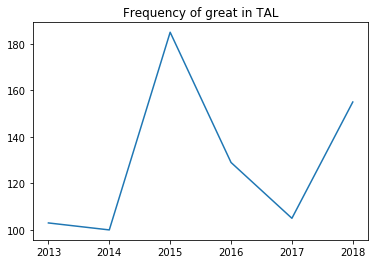

In [77]:
helper.plot_count(tal_df, before_elect + after_elect, 'great')

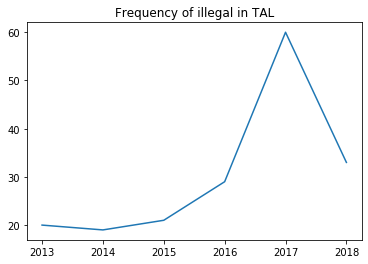

In [78]:
helper.plot_count(tal_df, before_elect + after_elect, 'illegal')

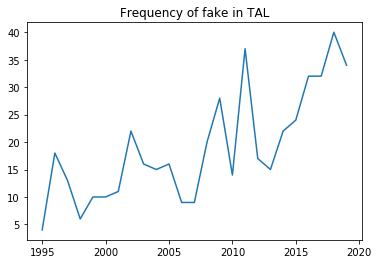

In [236]:
helper.plot_count(tal_df, tal_df['year'].unique(), 'fake')

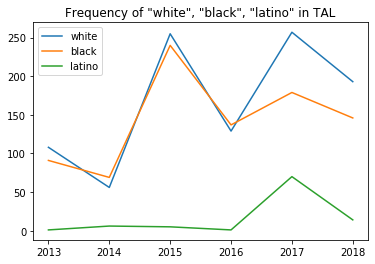

In [234]:
helper.plot_two_count(tal_df, before_elect+after_elect, 'white', 'black', 'latino')

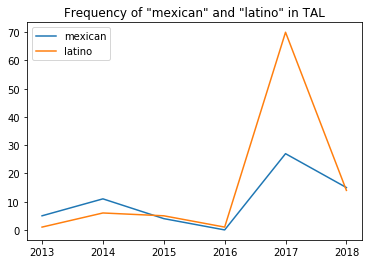

In [237]:
helper.plot_two_count(tal_df, before_elect+after_elect, 'mexican', 'latino')

## Most Common Adj

In [80]:
for year in by_year_elect.keys():
    df = by_year_elect[year]
    res = helper.most_common_adj(df, 'trump')
    print(year)
    print(res)
    print()

/Users/katykoeing/Desktop/computational-content-analysis/nlp-tal/source/helper_functions.py:380: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['POS_sents'] = df.apply(lambda x: tag_sents_pos(x['tokenized_sents']), axis=1)


2013
{}

2014
{'following': 1}

2015
{}

2016
{'sure': 1, 'pro': 1, 'active': 1, 'gay': 1, 'short': 1, 'reluctant': 1, 'many': 1}

2017
{'pro': 2, 'hardcore': 1, 'early': 1}

2018
{'12.The': 1, 'anti': 1}



In [136]:
for year in by_year_elect.keys():
    df = by_year_elect[year]
    res = helper.most_common_adj(df, 'protest')
    print(year)
    print(res)
    print()

2013
{'weekly': 2}

2014
{'public': 1}

2015
{'first': 1}

2016
{}

2017
{'silly': 1}

2018
{}



In [81]:
for year in by_year_elect.keys():
    df = by_year_elect[year]
    res = helper.most_common_adj(df, 'america')
    print(year)
    print(res)
    print()

2013
{}

2014
{'colonial': 1}

2015
{'conformist': 1, 'middle': 1}

2016
{'whole': 1, 'great': 1}

2017
{'noble': 1, 'white': 1}

2018
{'new': 1, 'white': 2, 'red': 1, 'blue': 1, 'whole': 1}



In [82]:
for year in by_year_elect.keys():
    df = by_year_elect[year]
    res = helper.most_common_adj(df, 'government')
    print(year)
    print(res)
    print()

2013
{'other': 1, 'Honduran': 4, 'mini': 1, 'inept': 1, 'local': 1, 'entire': 1, 'federal': 23, 'different': 1, 'Roman': 2, 'Eritrean': 1, 'Israeli': 1, 'central': 1, 'big': 1}

2014
{'Mexican': 1, 'federal': 2, 'anti': 1, 'small': 1, 'Afghan': 1, 'skeptical': 1, 'recent': 1}

2015
{'municipal': 2, 'Korean': 1, 'Kenyan': 1, 'federal': 3, 'corrupt': 1, 'Chinese': 1, 'own': 1, 'inside': 1}

2016
{'federal': 9, 'small': 1, 'big': 1, 'Greek': 8, 'entire': 2, 'secure': 2, 'Roman': 2}

2017
{'Iraqi': 1, 'other': 1, 'possible': 1, 'entire': 2, 'American': 1, 'Hawaiian': 1, 'own': 1, 'official': 1, 'anti': 1, 'Russian': 1, 'pro': 1, 'Chinese': 4, 'central': 2, 'federal': 7, 'Somali': 2, 'Japanese': 1, 'German': 1, 'local': 2, 'nationwide': 1}

2018
{'Korean': 1, 'Spanish': 1, 'Moroccan': 1, 'Mexican': 2, 'Kenyan': 2, 'limited': 1, 'big': 1, 'transitional': 1, 'real': 1}



In [101]:
for year in by_year_elect.keys():
    df = by_year_elect[year]
    res = helper.most_common_adj(df, 'american')
    print(year)
    print(res)
    print()

2013
{'North': 2, 'Italian': 1, 'enormous': 1, 'dirty': 1, 'African': 6, 'distressed': 1, 'nice': 1}

2014
{'perfect': 1, 'cheesy': 1, 'Mexican': 1, 'Native': 3, 'celebrated': 1, 'African': 4, 'nice': 1, 'other': 1, 'healthy': 1}

2015
{'young': 1, 'ugly': 1, 'late': 1, 'wonderful': 1, 'proud': 2, 'new': 1, 'African': 8, 'major': 1, 'Native': 1, 'Central': 1, 'other': 1, 'white': 1, 'black': 1, 'first': 1, 'old': 1, 'long': 1, 'lonely': 1, 'real': 1, 'South': 2}

2016
{'African': 1, 'real': 1, 'Iranian': 1, 'Nigerian': 2, 'Spanish': 1, 'new': 1, 'exaggerated': 1, 'stupid': 1, 'anti': 1, 'average': 1, 'strong': 1}

2017
{'small': 1, 'new': 1, 'several': 1, 'African': 2, 'black': 1, 'strong': 1, 'mini': 1, 'first': 1, 'Native': 1}

2018
{'Native': 1, 'private': 1, 'African': 11, 'Latin': 1, 'Central': 2, 'sprint': 1, 'old': 2, 'entire': 1, 'quintessential': 1, 'Chinese': 1, 'Iranian': 1, 'Many': 1}



In [200]:
for year in by_year_elect.keys():
    df = by_year_elect[year]
    res = helper.most_common_adj(df, 'mexican')
    print(year)
    print(res)
    print()

2013
{}

2014
{'desirable': 1, 'preppy': 1, 'tiny': 1}

2015
{}

2016
{}

2017
{'major': 1, 'Naomi': 1, 'undocumented': 1, 'single': 1, 'only': 1}

2018
{'undocumented': 1, 'tiny': 1}



In [106]:
for year in by_year_elect.keys():
    df = by_year_elect[year]
    res = helper.most_common_adj(df, 'court')
    print(year)
    print(res)
    print()

2013
{'federal': 2}

2014
{'rabbinic': 3, 'original': 1, 'magistrate': 1, 'full': 1, 'impending': 1, 'federal': 1}

2015
{'rabbinic': 3}

2016
{'federal': 1, 'appellate': 1, 'faxed': 1, 'first': 1, 'criminal': 1}

2017
{'municipal': 1, 'actual': 1, 'federal': 5, 'appellate': 1}

2018
{'big': 1, 'criminal': 3, 'federal': 1}



In [107]:
for year in by_year_elect.keys():
    df = by_year_elect[year]
    res = helper.most_common_adj(df, 'election')
    print(year)
    print(res)
    print()

2013
{'judicial': 1, 'presidential': 1}

2014
{'last': 1}

2015
{'main': 1}

2016
{'enjoyable': 1, 'perfect': 1, 'presidential': 6, 'daily': 1, 'mock': 1, 'awful': 1}

2017
{'future': 1, 'bitter': 1, 'primary': 1, 'congressional': 1, 'presidential': 4, 'next': 2}

2018
{'presidential': 1, 'general': 3, 'last': 1}



In [110]:
for year in by_year_elect.keys():
    df = by_year_elect[year]
    res = helper.most_common_adj(df, 'white')
    print(year)
    print(res)
    print()

2013
{'whole': 1, 'pinkish': 1, 'red': 1, 'great': 1, 'crisp': 2, 'few': 1, 'plain': 1, 'big': 1, 'other': 3, 'young': 1, 'youngish': 2, 'average': 2, 'black': 2, 'angry': 1, 'murderous': 2, 'white': 1, 'old': 1}

2014
{'blind': 1, 'light': 1, 'black': 3, 'red': 1, 'petite': 1, 'rich': 1, 'big': 1, 'huge': 1, 'many': 1}

2015
{'tiny': 1, 'short': 1, 'unarmed': 1, 'black': 4, 'young': 3, 'many': 1, 'blind': 1, 'light': 1, 'little': 1, 'blonde': 1, 'private': 1, 'enough': 1, 'racist': 1, 'clean': 1, 'poor': 2, 'crazy': 1, 'massive': 1, 'only': 1, 'difficult': 1, 'small': 2, 'few': 1, 'encouraging': 1, 'other': 1, 'old': 1, 'sheltered': 1, 'mainstream': 1}

2016
{'old': 1, 'little': 3, 'many': 1, 'first': 1, 'ugly': 1, 'red': 1, 'other': 1, 'bright': 1, 'pure': 3, 'plain': 2, 'wild': 2, 'brilliant': 2}

2017
{'annual': 1, 'young': 1, 'mysterious': 1, 'red': 1, 'huge': 1, 'bright': 1, 'old': 1, 'burly': 1, 'wealthy': 1, 'Caucasian': 1, 'southern': 1, 'aged': 1, 'super': 1, 'basic': 1, 'unq

In [111]:
for year in by_year_elect.keys():
    df = by_year_elect[year]
    res = helper.most_common_adj(df, 'public')
    print(year)
    print(res)
    print()

2013
{'typical': 1, 'many': 1, 'free': 1, 'first': 1, 'own': 1, 'lewd': 1, 'massive': 1}

2014
{'many': 1, 'genuine': 1, 'general': 1, 'fellow': 2, 'other': 1, 'pro': 1, 'traditional': 1, 'shuttered': 1, 'unquote': 1, 'local': 1, 'non': 1, 'single': 1, 'chaotic': 1}

2015
{'local': 1, 'new': 1, 'crowded': 1, 'American': 3, 'poor': 1, 'many': 1, 'big': 1, 'awesome': 1, 'Japanese': 1, 'secret': 1, 'regular': 2, 'general': 1, 'experienced': 1, 'racist': 1}

2016
{'general': 1, 'nice': 1, 'enough': 1, 'chief': 2, 'normal': 1}

2017
{'other': 1, 'awkward': 1, 'free': 1, 'regular': 2, 'local': 2, 'anti': 1, 'traditional': 4, 'whole': 1, 'great': 1, 'cheerful': 1, 'photo': 1, 'big': 1}

2018
{'much': 1, 'general': 2, 'vicious': 1, 'federal': 1, 'other': 1, 'deliberate': 1, 'regular': 1, 'only': 1}



## Word Networks

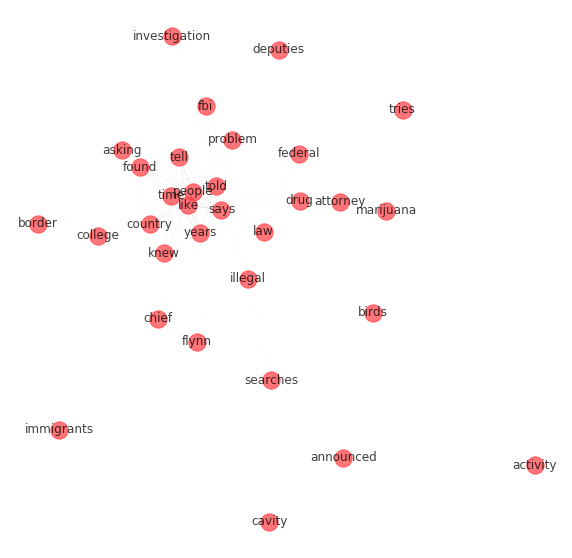

In [177]:
helper.graph_nx_word(before_elect_df, 'no_lemma_normalized_sents', 2, 'illegal')

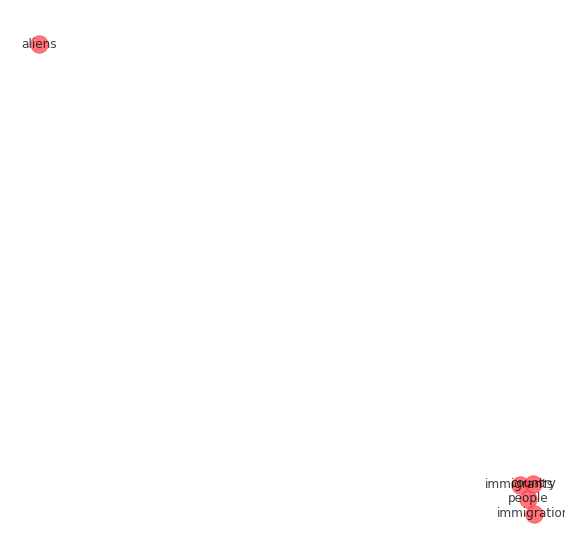

In [180]:
helper.graph_nx_word(after_elect_df, 'no_lemma_normalized_sents', 8, 'illegal')

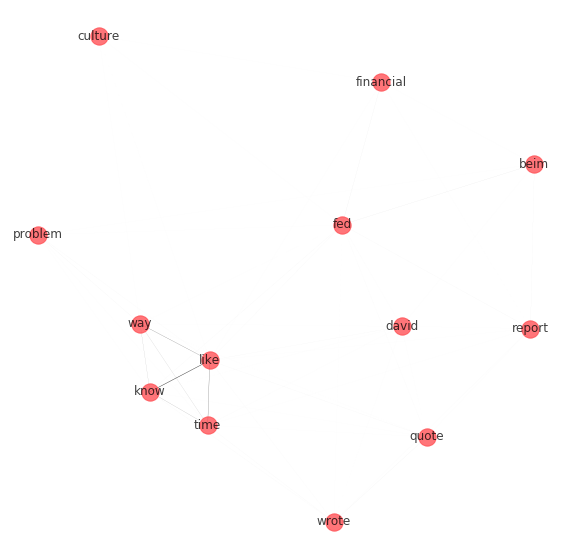

In [204]:
helper.graph_nx_word(before_elect_df, 'no_lemma_normalized_sents', 2, 'crisis')

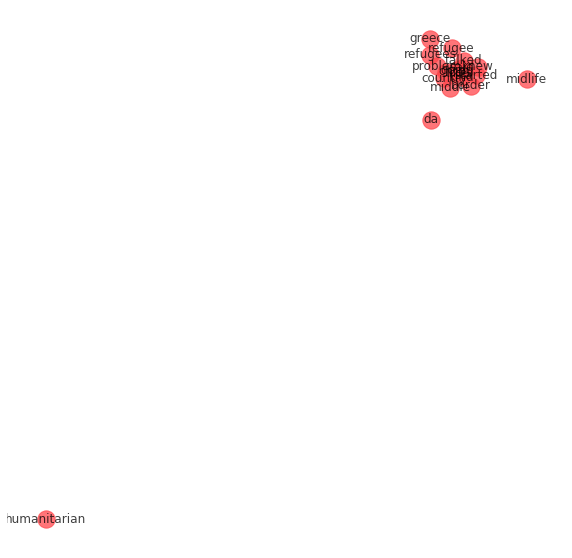

In [203]:
helper.graph_nx_word(after_elect_df, 'no_lemma_normalized_sents', 2, 'crisis')

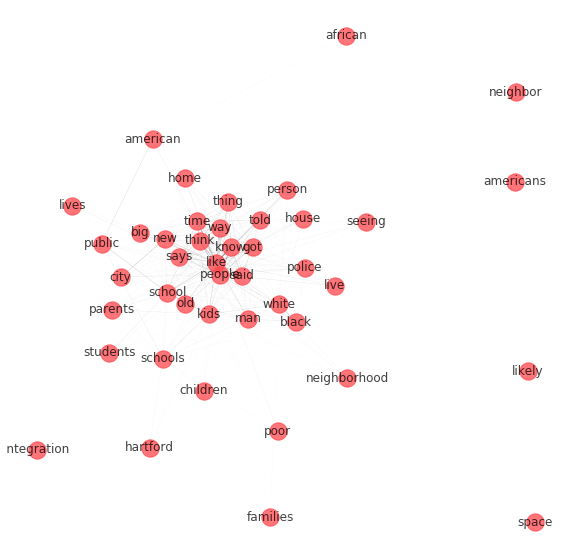

In [208]:
helper.graph_nx_word(before_elect_df, 'no_lemma_normalized_sents', 7, 'white')

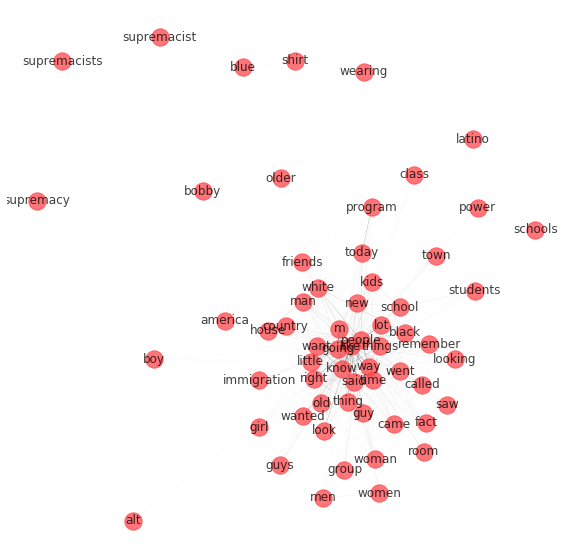

In [209]:
helper.graph_nx_word(after_elect_df, 'no_lemma_normalized_sents', 7, 'white')

## Embedding Bias

In [87]:
# create representative group 
# male
male = ['he', 'son', 'boys', 'boy', 'male', 'man', 'men', 'his', 'nephew',
        'nephews', 'brother', 'brothers', 'father', 'uncle', 'uncles', 'himself']
# female, from the Garg paper
female = ['she', 'daughter', 'hers', 'her', 'mother', 'woman', 'girl', 'herself',
          'female', 'females', 'sister', 'daughters', 'mothers',
          'women', 'girls', 'sisters', 'aunt', 'aunts', 'niece', 'nieces']
# rich
rich = ['rich', 'wealthy', 'wealth', 'expensive', 'affluent', 'affluence', 'afford']
# poor
poor = ['poor', 'cheap', 'poverty', 'broke']

In [90]:
# pre
talW2V_elect = gensim.models.word2vec.Word2Vec(before_elect_df['no_lemma_normalized_sents'].sum(), 
                                         size=1000)
elect_male_vec = helper.mk_rep_group_vec(talW2V_elect, male)
elect_female_vec = helper.mk_rep_group_vec(talW2V_elect, female)
elect_rich_vec = helper.mk_rep_group_vec(talW2V_elect, rich)
elect_poor_vec = helper.mk_rep_group_vec(talW2V_elect, poor)

In [91]:
# now try on post
talW2V01_elect = gensim.models.word2vec.Word2Vec(after_elect_df['no_lemma_normalized_sents'].sum(),
                                           size=1000)
elect_male_vec01 = helper.mk_rep_group_vec(talW2V01_elect, male)
elect_female_vec01 = helper.mk_rep_group_vec(talW2V01_elect, female)
elect_rich_vec01 = helper.mk_rep_group_vec(talW2V01_elect, rich)
elect_poor_vec01 = helper.mk_rep_group_vec(talW2V01_elect, poor)

In [92]:
# neutral word list
liberal = ['liberal', 'progressive', 'democrat'] 
conservative = ['conservative', 'republican']
finance = ['save', 'savings', 'loan', 'debt', 'bank',
           'banking', 'mortgage', 'money']
anger = ['angry', 'mad', 'hate', 'anger', 'disgust']
fear = ['scared', 'fear', 'scary', 'afraid']
happy = ['happy', 'excited', 'enjoy', 'enjoying']
sad = ['sad', 'unhappy', 'tears']

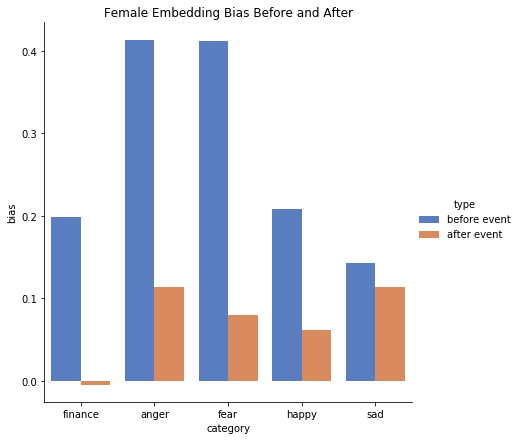

In [93]:
wordlist_dict = {'finance': finance, 'anger': anger,
                 'fear': fear, 'happy': happy, 'sad': sad}
pre_dict = {'model': talW2V, 'group_vec': female_vec,
            'compare_vec': male_vec}
post_dict = {'model': talW2V01, 'group_vec': female_vec01,
             'compare_vec': male_vec01}

helper.plot_bias(pre_dict, post_dict,
                 'Female Embedding Bias Before and After',
                 wordlist_dict)

## Most similar

In [201]:
most_similar_election = helper.agg_sim_words([talW2V_elect, talW2V01_elect],
                     ['before election', 'after after'], elect_word1 + elect_word2)
most_similar_election.head()

,security,immigration,immigrant,illegal,protest,decency,wall,china,trade,great,...,mexico,love,hate,america,american,country,safe,family,home,period
0,"[(according, 0.999903678894043), (pages, 0.999...","[(documents, 0.999925971031189), (investigatio...","[(road, 0.9999195337295532), (mcneil, 0.999909...","[(iraq, 0.9999101161956787), (officially, 0.99...","[(interviews, 0.9998399019241333), (subject, 0...",NA,"[(seat, 0.9999144077301025), (charge, 0.999898...","[(continued, 0.9999092221260071), (egypt, 0.99...","[(bills, 0.9999239444732666), (70s, 0.99991118...","[(sound, 0.9995348453521729), (mind, 0.9993659...",...,"[(moved, 0.9991026520729065), (hypothesis, 0.9...","[(to--, 0.9987203478813171), (totally, 0.99856...","[(obvious, 0.9998466968536377), (cause, 0.9998...","[(regular, 0.999905526638031), (cracked, 0.999...","[(wbez, 0.9830749034881592), (public, 0.975195...","[(francisco, 0.9996967911720276), (reported, 0...","[(fuck, 0.99985671043396), (sleep, 0.999822437...","[(reminds, 0.9989326000213623), (finally, 0.99...","[(bedroom, 0.9989762902259827), (morning, 0.99...",before election
1,"[(government, 0.9991199970245361), (immigratio...","[(security, 0.9990454316139221), (government, ...","[(cloud, 0.9998400211334229), (st, 0.999824285...","[(legislature, 0.9997485876083374), (officials...","[(ordered, 0.9999126195907593), (picked, 0.999...","[(fuel, 0.9998359084129333), (launch, 0.999825...","[(orange, 0.9997844696044922), (autopsy, 0.999...","[(concrete, 0.9998615980148315), (entirely, 0....","[(d, 0.9998603463172913), (jqc, 0.999853372573...","[(nice, 0.9991393089294434), (sadness, 0.99905...",...,"[(seat, 0.9996793866157532), (representatives,...","[(need, 0.9978838562965393), (let, 0.997750222...","[(cop, 0.9998995661735535), (presence, 0.99989...","[(power, 0.9997929334640503), (ballot, 0.99967...","[(wbez, 0.9777863025665283), (chicago, 0.97535...","[(government, 0.9985477924346924), (security, ...","[(guilty, 0.9998350143432617), (imagine, 0.999...","[(college, 0.9985378384590149), (family--, 0.9...","[(college, 0.997954785823822), (graduate, 0.99...",after after


In [202]:
most_similar_election.to_csv('most_similar_election.csv', index=False)

## Plot Dimensions

In [95]:
# dimensions
Gender = helper.dimension(talW2V, ['man','guy', 'male'],
                          ['woman', 'girl', 'female'])
Race = helper.dimension(talW2V, ['black', 'brown', 'minority'],
                        ['white'])
Class = helper.dimension(talW2V, ['rich', 'expensive', 'wealth'],
                         ['poor', 'cheap', 'poor'])

Morality = helper.dimension(talW2V, ['good', 'good', 'honest','pure'], 
                     ['bad', 'evil','lie','dirty'])

Education = helper.dimension(talW2V, ['educated','smart'], 
                             ['dumb','stupid'])
dim_dict = {'gender': Gender, 'race': Race, 'class': Class,
            'morality': Morality, 'education': Education}

In [96]:
# word lists
emotions = ['happy', 'sad', 'excited','fear', 'lonely', 'ashamed', 'shame', 
            'embarrassed', 'hate', 'love', 'anger', 'upset',
            'tired', 'lazy', 'hope']

opinions = ['believe', 'belief', 'perspective', 'opinion',
            'thought', 'think', 'attitude']

self = ['self', 'appearance', 'looks', 'confidence', 'gay',
        'black', 'white', 'american']

rel = ['single', 'divorce', 'divorced', 'family', 'brother',
       'sister', 'children', 'aunt', 'uncle',
       'child', 'wedding', 'married', 'marriage', 'boyfriend',
       'girlfriend', 'partner', 'love']

In [97]:
emotions = ['scared', 'secure', 'nervous', 'hopeful', 'security']
Emodf = helper.makeDF(talW2V_elect, emotions, dim_dict)
Opdf = helper.makeDF(talW2V_elect, opinions, dim_dict)
Selfdf = helper.makeDF(talW2V_elect, self, dim_dict)
Reldf = helper.makeDF(talW2V_elect, rel, dim_dict)

Emotions


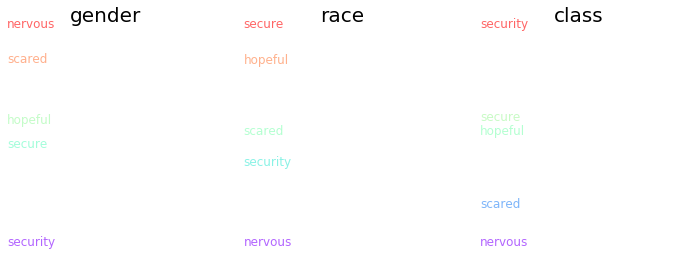

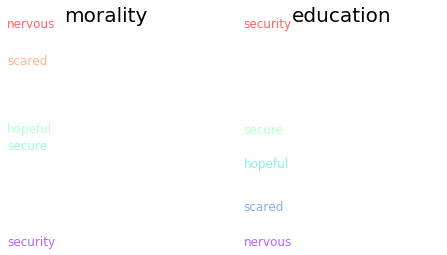

In [98]:
# Pre
# display words on dimensions
print('Emotions')
fig = plt.figure(figsize = (12,4))
ax1 = fig.add_subplot(131)
helper.PlotDimension(ax1, Emodf, 'gender')
ax2 = fig.add_subplot(132)
helper.PlotDimension(ax2, Emodf, 'race')
ax3 = fig.add_subplot(133)
helper.PlotDimension(ax3, Emodf, 'class')
plt.show()
fig = plt.figure(figsize = (12,4))
ax1 = fig.add_subplot(131)
helper.PlotDimension(ax1, Emodf, 'morality')
ax2 = fig.add_subplot(132)
helper.PlotDimension(ax2, Emodf, 'education')
plt.show()

In [99]:
# post dimensions
Gender01 = helper.dimension(talW2V01_elect, ['man','guy', 'male','brother','father', 'son'], 
                            ['woman', 'girl', 'female','sister', 'mother','daughter'])
Race01 = helper.dimension(talW2V01, ['black','blacks', 'brown'],
                          ['white', 'whites'])
Class01 = helper.dimension(talW2V01_elect, ['rich', 'expensive', 'wealthy'],
                           ['poor', 'cheap', 'poor'])

Morality01 = helper.dimension(talW2V01_elect, ['good', 'good', 'honest','pure'], 
                             ['bad', 'evil','lie','dirty'])

Education01 = helper.dimension(talW2V01_elect, ['educated', 'smart', 'college'], 
                              ['dumb', 'stupid'])
dim_dict01 = {'gender': Gender01, 'race': Race01, 'class': Class01,
              'morality': Morality01, 'education':  Education01}

Emotions


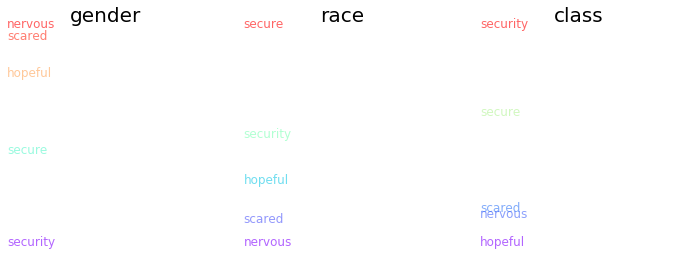

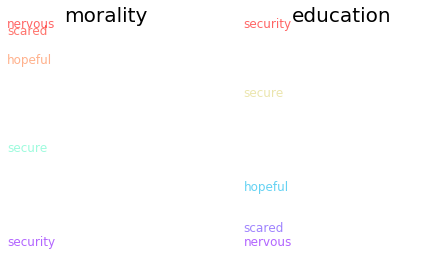

In [100]:
Emodf = helper.makeDF(talW2V01_elect, emotions, dim_dict01)
Opdf = helper.makeDF(talW2V01_elect, opinions, dim_dict01)
Selfdf = helper.makeDF(talW2V01_elect, self, dim_dict01)
Reldf = helper.makeDF(talW2V01_elect, rel, dim_dict01)


print('Emotions')
fig = plt.figure(figsize = (12,4))
ax1 = fig.add_subplot(131)
helper.PlotDimension(ax1, Emodf, 'gender')
ax2 = fig.add_subplot(132)
helper.PlotDimension(ax2, Emodf, 'race')
ax3 = fig.add_subplot(133)
helper.PlotDimension(ax3, Emodf, 'class')
plt.show()
fig = plt.figure(figsize = (12,4))
ax1 = fig.add_subplot(131)
helper.PlotDimension(ax1, Emodf, 'morality')
ax2 = fig.add_subplot(132)
helper.PlotDimension(ax2, Emodf, 'education')
plt.show()